# Mini Project 3

## Predicting Liver Cirrhosis Stages

#### Import Libraries

In [1]:
# compare standalone models for binary classification
from numpy import mean
from numpy import std
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from fasteda import fast_eda
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import itertools

import matplotlib.gridspec as gridspec

from sklearn import datasets

from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot

In [2]:
df = pd.read_csv("C:\\Users\\Orie\\Desktop\\DataProjects\\Cirrhosis\\cirrhosis.csv")
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


#### Data Cleaning

In [3]:
df=df.drop('ID', axis= 1)
print(df)

     N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0       400      D  D-penicillamine  21464   F       Y            Y       Y   
1      4500      C  D-penicillamine  20617   F       N            Y       Y   
2      1012      D  D-penicillamine  25594   M       N            N       N   
3      1925      D  D-penicillamine  19994   F       N            Y       Y   
4      1504     CL          Placebo  13918   F       N            Y       Y   
..      ...    ...              ...    ...  ..     ...          ...     ...   
413     681      D              NaN  24472   F     NaN          NaN     NaN   
414    1103      C              NaN  14245   F     NaN          NaN     NaN   
415    1055      C              NaN  20819   F     NaN          NaN     NaN   
416     691      C              NaN  21185   F     NaN          NaN     NaN   
417     976      C              NaN  19358   F     NaN          NaN     NaN   

    Edema  Bilirubin  Cholesterol  Albumin  Copper 

In [4]:
#Drop null values
df = df.dropna(subset=['Drug'], how='all')

In [5]:
# Check shape after drop
df.shape

(312, 19)

In [6]:
df.isnull().sum()

N_Days            0
Status            0
Drug              0
Age               0
Sex               0
Ascites           0
Hepatomegaly      0
Spiders           0
Edema             0
Bilirubin         0
Cholesterol      28
Albumin           0
Copper            2
Alk_Phos          0
SGOT              0
Tryglicerides    30
Platelets         4
Prothrombin       0
Stage             0
dtype: int64

#### Replace all missing values with average values.

In [7]:
####Replace all missing values with average values.####

df.fillna(np.mean, inplace=True)
#

In [8]:
#Check entire dataframe
df.isnull().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [9]:
#List of columns to graph
to_graph = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage']

# Function to create a bar plot for a given column
def graph(series):
    if isinstance(series, pd.Series):
        counts = series.value_counts()
        plt.bar(counts.index, counts.values)
        plt.title(f"Bar Plot of {series.name}")
        plt.xlabel("Category")
        plt.ylabel("Count")
        plt.show()
   


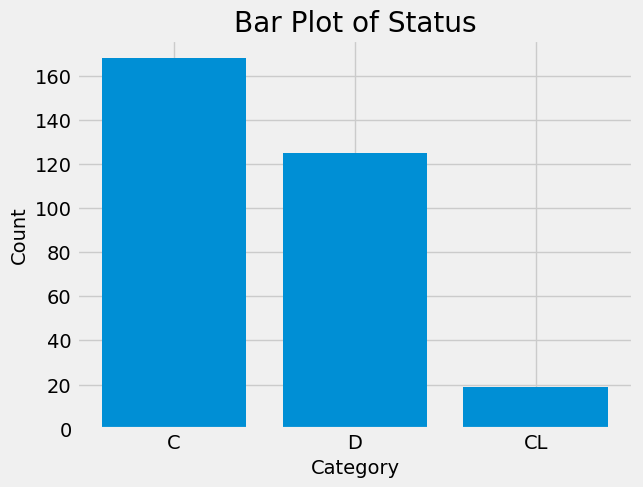

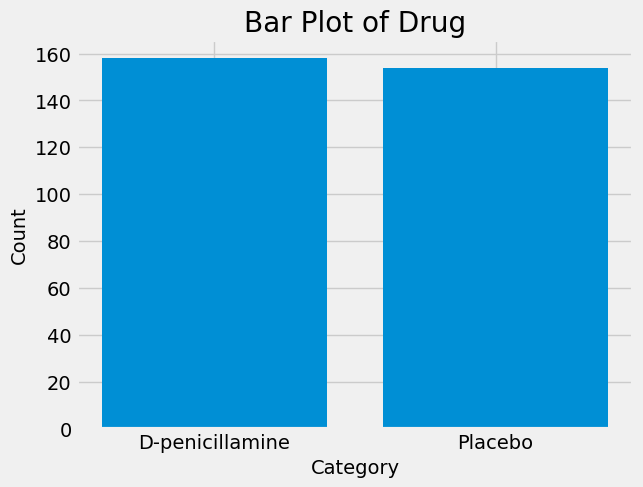

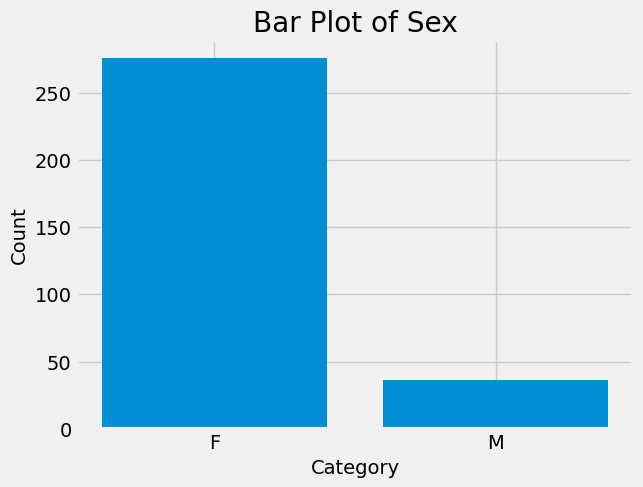

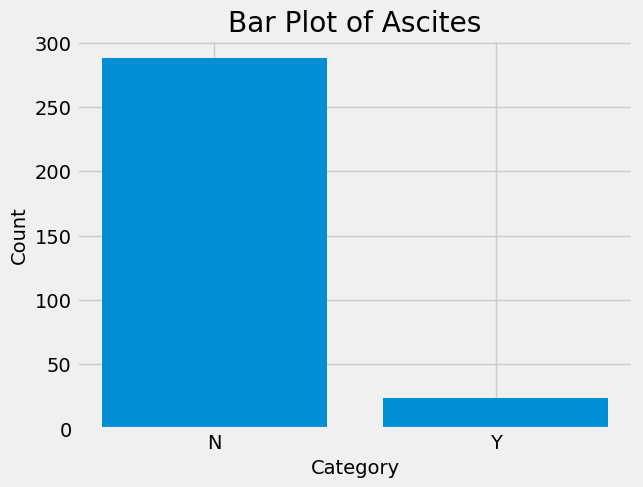

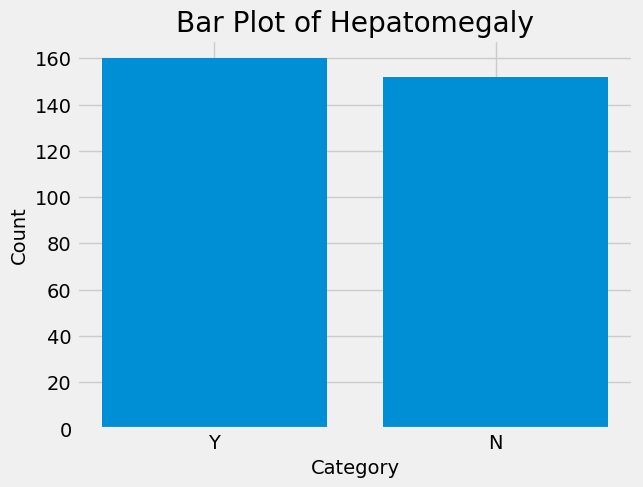

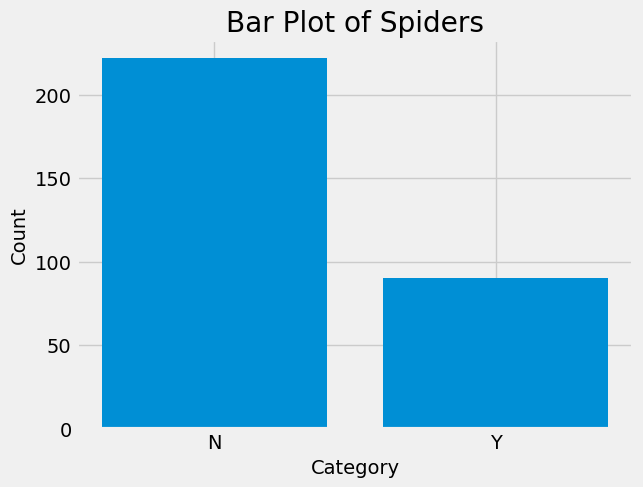

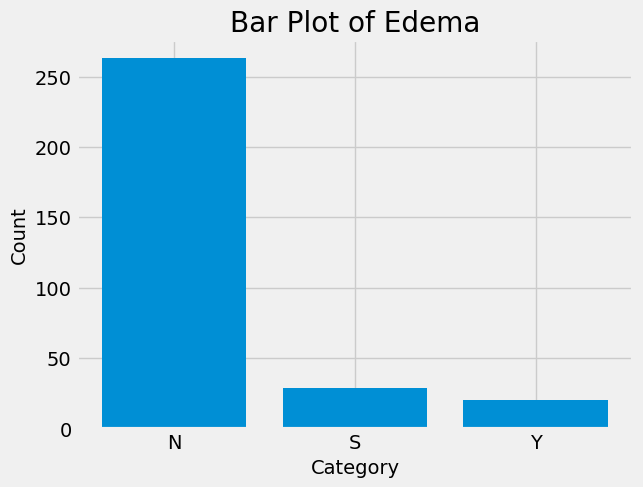

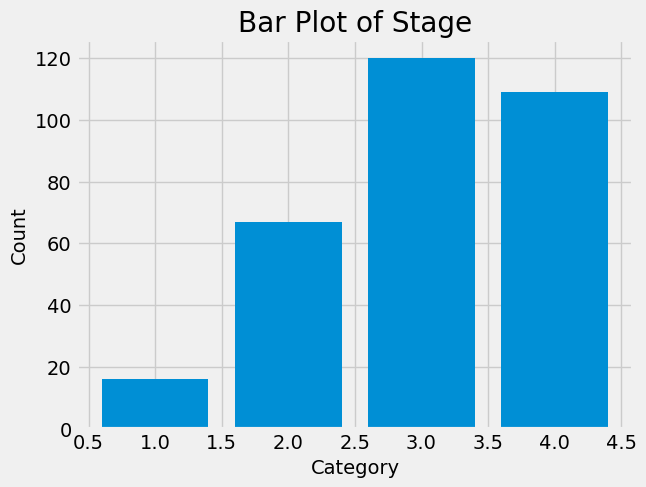

Status          None
Drug            None
Sex             None
Ascites         None
Hepatomegaly    None
Spiders         None
Edema           None
Stage           None
dtype: object

In [10]:
df[to_graph].apply(graph, axis=0)

#### Map variables to numbers

In [11]:
# Map 
le = LabelEncoder()
df['Status']= le.fit_transform(df['Status'])
print(df['Status'])

# Deceased = 2, Censored= 0, Censored due to Liver Transplant= 1

0      2
1      0
2      2
3      2
4      1
      ..
307    0
308    0
309    0
310    0
311    0
Name: Status, Length: 312, dtype: int32


In [12]:
df['Drug'] = le.fit_transform(df['Drug'])
print(df['Drug'])

# D-penicillamine = 0, Placebo = 1

0      0
1      0
2      0
3      0
4      1
      ..
307    0
308    1
309    0
310    0
311    1
Name: Drug, Length: 312, dtype: int32


In [13]:
df['Ascites'] = le.fit_transform(df['Ascites'])
print(df['Ascites'])

# Y = 1, N = 0

0      1
1      0
2      0
3      0
4      0
      ..
307    0
308    0
309    0
310    0
311    0
Name: Ascites, Length: 312, dtype: int32


In [14]:
df['Hepatomegaly'] = le.fit_transform(df['Hepatomegaly'])
print(df['Hepatomegaly'])

# Y = 1, N = 0

0      1
1      1
2      0
3      1
4      1
      ..
307    1
308    0
309    0
310    0
311    0
Name: Hepatomegaly, Length: 312, dtype: int32


In [15]:
df['Spiders'] = le.fit_transform(df['Spiders'])
print(df['Spiders'])

# Y = 1, N = 0

0      1
1      1
2      0
3      1
4      1
      ..
307    0
308    0
309    0
310    0
311    1
Name: Spiders, Length: 312, dtype: int32


In [16]:
df['Edema'] = le.fit_transform(df['Edema'])
print(df['Edema'])

#presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)
# 2 = Y, 1 = S, 0 = N

0      2
1      0
2      1
3      1
4      0
      ..
307    0
308    0
309    0
310    0
311    0
Name: Edema, Length: 312, dtype: int32


In [17]:
df['Sex'] = le.fit_transform(df['Sex'])
print(df['Sex'])

#F=0, M=1

0      0
1      0
2      1
3      0
4      0
      ..
307    0
308    0
309    0
310    0
311    0
Name: Sex, Length: 312, dtype: int32


##### Perform EDA

In [18]:
df.describe()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Albumin,Alk_Phos,SGOT,Prothrombin,Stage
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000
mean,2006.362179,0.862179,0.493590,18269.442308,0.115385,0.076923,0.512821,0.288462,0.221154,3.256090,3.520000,1982.655769,122.556346,10.725641,3.032051
std,1123.280843,0.960764,0.500762,3864.805407,0.319999,0.266897,0.500639,0.453775,0.549014,4.530315,0.419892,2140.388824,56.699525,1.004323,0.877880
min,41.000000,0.000000,0.000000,9598.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,1.960000,289.000000,26.350000,9.000000,1.000000
25%,1191.000000,0.000000,0.000000,15427.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,3.310000,871.500000,80.600000,10.000000,2.000000
50%,1839.500000,0.000000,0.000000,18187.500000,0.000000,0.000000,1.000000,0.000000,0.000000,1.350000,3.550000,1259.000000,114.700000,10.600000,3.000000
75%,2697.250000,2.000000,1.000000,20715.000000,0.000000,0.000000,1.000000,1.000000,0.000000,3.425000,3.800000,1980.000000,151.900000,11.100000,4.000000
max,4556.000000,2.000000,1.000000,28650.000000,1.000000,1.000000,1.000000,1.000000,2.000000,28.000000,4.640000,13862.400000,457.250000,17.100000,4.000000


In [19]:
df.dtypes

N_Days             int64
Status             int32
Drug               int32
Age                int64
Sex                int32
Ascites            int32
Hepatomegaly       int32
Spiders            int32
Edema              int32
Bilirubin        float64
Cholesterol       object
Albumin          float64
Copper            object
Alk_Phos         float64
SGOT             float64
Tryglicerides     object
Platelets         object
Prothrombin      float64
Stage            float64
dtype: object

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 0 to 311
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         312 non-null    int64  
 1   Status         312 non-null    int32  
 2   Drug           312 non-null    int32  
 3   Age            312 non-null    int64  
 4   Sex            312 non-null    int32  
 5   Ascites        312 non-null    int32  
 6   Hepatomegaly   312 non-null    int32  
 7   Spiders        312 non-null    int32  
 8   Edema          312 non-null    int32  
 9   Bilirubin      312 non-null    float64
 10  Cholesterol    312 non-null    object 
 11  Albumin        312 non-null    float64
 12  Copper         312 non-null    object 
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  312 non-null    object 
 16  Platelets      312 non-null    object 
 17  Prothrombin    312 non-null    float64
 18  Stage     

In [21]:
df.isnull().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

C:\Users\Orie\AppData\Local\Temp\ipykernel_2576\1537732309.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr().T


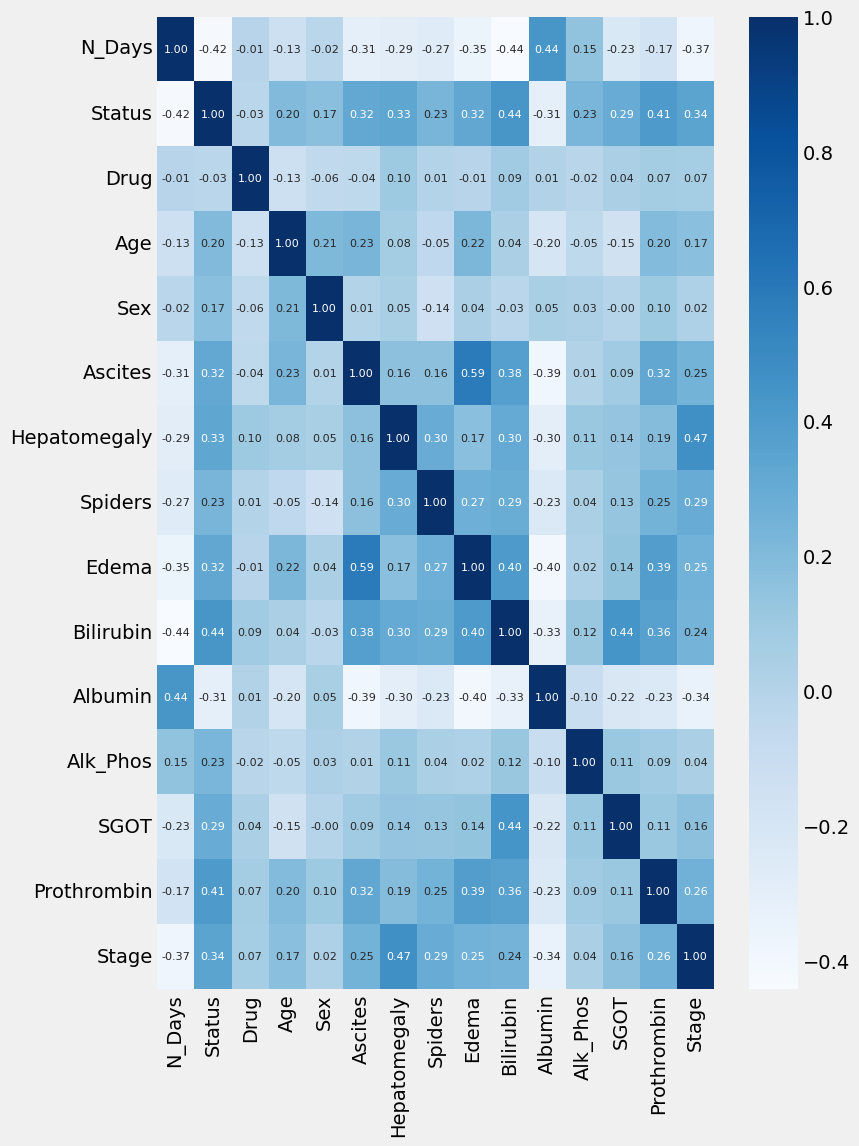

In [22]:

# Calculate the correlation matrix and transpose it
corr = df.corr().T

# Create a heatmap with smaller annotation font size
plt.figure(figsize=(8, 12))  # Adjusted figure size for vertical orientation
sns.heatmap(
    corr,
    annot=True,
    cmap='Blues', 
    fmt=".2f",  # Two decimal places for consistency
    annot_kws={'size': 8}  # Font size of the annotations
)

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=90, ha='center')  # Rotate x-axis labels vertically
plt.yticks(rotation=0)  # Keep y-axis labels horizontal

plt.show()

In [23]:
df.shape

(312, 19)

In [24]:
target_variable = df["Status"]
predictor_variables = df[[column for column in list(df.columns) if column != 'Status']]
print(target_variable)
print(predictor_variables)

0      2
1      0
2      2
3      2
4      1
      ..
307    0
308    0
309    0
310    0
311    0
Name: Status, Length: 312, dtype: int32
     N_Days  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  \
0       400     0  21464    0        1             1        1      2   
1      4500     0  20617    0        0             1        1      0   
2      1012     0  25594    1        0             0        0      1   
3      1925     0  19994    0        0             1        1      1   
4      1504     1  13918    0        0             1        1      0   
..      ...   ...    ...  ...      ...           ...      ...    ...   
307    1153     0  22347    0        0             1        0      0   
308     994     1  21294    0        0             0        0      0   
309     939     0  22767    0        0             0        0      0   
310     839     0  13879    0        0             0        0      0   
311     788     1  12109    0        0             0        1      0 

In [25]:
X = predictor_variables
y = target_variable
print(X.shape)
print(y.shape)

(312, 18)
(312,)


In [26]:
columns_to_check = ['Copper', 'Cholesterol', 'Platelets', 'Tryglicerides']

# Identify non-numeric values in these columns
for col in columns_to_check:
    non_numeric_values = df[df[col].apply(lambda x: not str(x).replace('.', '', 1).isdigit())]
    if not non_numeric_values.empty:
        print(f"Non-numeric values in {col}:", non_numeric_values[col].unique())

Non-numeric values in Copper: [<function mean at 0x000001756BFD4670>]
Non-numeric values in Cholesterol: [<function mean at 0x000001756BFD4670>]
Non-numeric values in Platelets: [<function mean at 0x000001756BFD4670>]
Non-numeric values in Tryglicerides: [<function mean at 0x000001756BFD4670>]


### The Mean values we put in earlier for the missing values is throwing an error. We need to sub in floats as opposed to a function.


In [27]:
#Columns to check
columns_to_check = ['Copper', 'Cholesterol', 'Platelets', 'Tryglicerides']

# Find rows with function references
for col in columns_to_check:
    non_numeric_rows = df[df[col].apply(lambda x: isinstance(x, (str, type(None))) and 'function' in str(x))]
    if not non_numeric_rows.empty:
        print(f"Rows with functions in {col}:", non_numeric_rows.index.tolist())

In [28]:
means = {}
for col in columns_to_check:
    valid_values = df[df[col].apply(lambda x: str(x).replace('.', '', 1).isdigit())][col]
    means[col] = valid_values.astype(float).mean()  # Calculate mean as float

In [29]:
# Replace function references with calculated means
for col in columns_to_check:
    # Replace invalid rows with the mean value
    df.loc[non_numeric_rows.index, col] = means[col]

In [30]:
for col in columns_to_check:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(means[col])  # Convert to float

In [31]:
# Confirm data types are now floats
print(df.dtypes)

# Check for NaN counts in each column
print(df.isnull().sum())

N_Days             int64
Status             int32
Drug               int32
Age                int64
Sex                int32
Ascites            int32
Hepatomegaly       int32
Spiders            int32
Edema              int32
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64


In [32]:

problematic_values = {}

# Assuming 'X' is the feature DataFrame
for col in X.columns:
    non_numeric_rows = X[X[col].apply(lambda x: isinstance(x, (str, object)) and 'function' in str(x))]
    if not non_numeric_rows.empty:
        problematic_values[col] = non_numeric_rows[col].tolist()

# Display problematic values for each column
for col, values in problematic_values.items():
    print(f"Problematic values in column {col}:", values)

Problematic values in column Cholesterol: [<function mean at 0x000001756BFD4670>, <function mean at 0x000001756BFD4670>, <function mean at 0x000001756BFD4670>, <function mean at 0x000001756BFD4670>, <function mean at 0x000001756BFD4670>, <function mean at 0x000001756BFD4670>, <function mean at 0x000001756BFD4670>, <function mean at 0x000001756BFD4670>, <function mean at 0x000001756BFD4670>, <function mean at 0x000001756BFD4670>, <function mean at 0x000001756BFD4670>, <function mean at 0x000001756BFD4670>, <function mean at 0x000001756BFD4670>, <function mean at 0x000001756BFD4670>, <function mean at 0x000001756BFD4670>, <function mean at 0x000001756BFD4670>, <function mean at 0x000001756BFD4670>, <function mean at 0x000001756BFD4670>, <function mean at 0x000001756BFD4670>, <function mean at 0x000001756BFD4670>, <function mean at 0x000001756BFD4670>, <function mean at 0x000001756BFD4670>, <function mean at 0x000001756BFD4670>, <function mean at 0x000001756BFD4670>, <function mean at 0x0

In [33]:
# Columns to check
columns_to_check = ['Cholesterol', 'Copper', 'Tryglicerides', 'Platelets']

# Replace function references with NaN
for col in columns_to_check:
    # Identify rows with function references
    non_numeric_rows = X[X[col].apply(lambda x: isinstance(x, (str, object)) and 'function' in str(x))]

    # Replace those values with NaN
    X.loc[non_numeric_rows.index, col] = float('nan')


In [34]:
# Fill NaNs with the column's mean or a specific value
for col in columns_to_check:
    # Convert column to float and fill NaNs
    X[col] = pd.to_numeric(X[col], errors='coerce')  # Ensure numeric type
    X[col].fillna(X[col].mean(), inplace=True)  # Fill NaNs with the mean

C:\Users\Orie\AppData\Local\Temp\ipykernel_2576\2102210802.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = pd.to_numeric(X[col], errors='coerce')  # Ensure numeric type
C:\Users\Orie\AppData\Local\Temp\ipykernel_2576\2102210802.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col].fillna(X[col].mean(), inplace=True)  # Fill NaNs with the mean


In [35]:
# Confirm data types
print("Data Types:")
print(X.dtypes)

# Check for any remaining function references
problematic_values = {}

for col in columns_to_check:
    non_numeric_rows = X[X[col].apply(lambda x: isinstance(x, (str, object)) and 'function' in str(x))]
    if not non_numeric_rows.empty:
        problematic_values[col] = non_numeric_rows[col].tolist()

print("Problematic Values:")
for col, values in problematic_values.items():
    print(f"Function references in {col}:", values)

Data Types:
N_Days             int64
Drug               int32
Age                int64
Sex                int32
Ascites            int32
Hepatomegaly       int32
Spiders            int32
Edema              int32
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object
Problematic Values:


#### Method 1. Bagging

In [36]:
#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

In [37]:
#Train a ML model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [38]:
from sklearn.metrics import classification_report

# Make prediction on the testing data
y_pred = pipeline.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.63      0.74      0.68        39
           1       0.14      0.17      0.15         6
           2       0.71      0.59      0.64        49

    accuracy                           0.63        94
   macro avg       0.49      0.50      0.49        94
weighted avg       0.64      0.63      0.63        94



In [39]:
# Evaluate the classifier using cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=5)

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {np.mean(cv_scores):.2f}")

Cross-validation scores: [0.55555556 0.61904762 0.62903226 0.62903226 0.40322581]
Mean CV accuracy: 0.57


In [40]:
# Create a bagging classifier with the decision tree pipeline
bagging_classifier = BaggingClassifier(base_estimator=pipeline, n_estimators=50, random_state=42)

# Train the bagging classifier on the training data
bagging_classifier.fit(X_train, y_train)

C:\Users\Orie\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                                 ('classifier',
                                                  DecisionTreeClassifier(random_state=42))]),
                  n_estimators=50, random_state=42)

In [41]:
# Evaluating ensemble method
# Make prediction on the testing data
y_pred = bagging_classifier.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        46
           1       0.14      1.00      0.25         1
           2       0.83      0.72      0.77        47

    accuracy                           0.77        94
   macro avg       0.59      0.84      0.61        94
weighted avg       0.81      0.77      0.78        94



In [42]:
# Evaluate the classifier using cross-validation
cv_scores = cross_val_score(bagging_classifier, X, y, cv=5)

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {np.mean(cv_scores):.2f}")

C:\Users\Orie\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Orie\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Orie\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Orie\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Orie\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Cross-validation scores: [0.71428571 0.77777778 0.75806452 0.69354839 0.38709677]
Mean CV accuracy: 0.67


#### Method 2. Boosting

In [43]:
# Define categorical and numerical features
categorical_features = X.select_dtypes(
   include=["object"]
).columns.tolist()

numerical_features = X.select_dtypes(
   include=["float64", "int64"]
).columns.tolist()

In [44]:
# Preprocessing for categorical and numerical features
preprocessor = ColumnTransformer(
   transformers=[
       ("cat", OneHotEncoder(), categorical_features),
       ("num", StandardScaler(), numerical_features),
   ]
)

In [45]:
# Create a Gradient Boosting Classifier pipeline
pipeline = Pipeline(
   [
       ("preprocessor", preprocessor),
       ("classifier", GradientBoostingClassifier(random_state=42)),
   ]
)

In [46]:
# Cross validation and training
# Perform 5-fold cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=5)

# Fit the model on the training data
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)

C:\Users\Orie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Orie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Orie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
# Results
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}")
print("\nClassification Report:")
print(report)

Mean Cross-Validation Accuracy: 0.6759

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.70      0.73        46
           1       0.00      0.00      0.00         7
           2       0.65      0.83      0.73        41

    accuracy                           0.70        94
   macro avg       0.47      0.51      0.49        94
weighted avg       0.66      0.70      0.67        94



#### 3. Stacking

In [48]:
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    return models

In [49]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [50]:
# Ensure 'X' and 'y' are NumPy arrays
X_np = np.asarray(X)  # Converts to NumPy array if needed
y_np = np.asarray(y)  # Converts to NumPy array if needed

In [51]:
# Make sure 'X' is C-contiguous
if not X_np.flags.c_contiguous:
    X_np = np.ascontiguousarray(X_np)

# Make sure 'y' is C-contiguous (shouldn't be necessary for 1D arrays, but to be safe)
if not y_np.flags.c_contiguous:
    y_np = np.ascontiguousarray(y_np)

>lr 0.733 (0.073)
>knn 0.657 (0.076)
>cart 0.666 (0.065)
>svm 0.680 (0.077)
>bayes 0.728 (0.085)


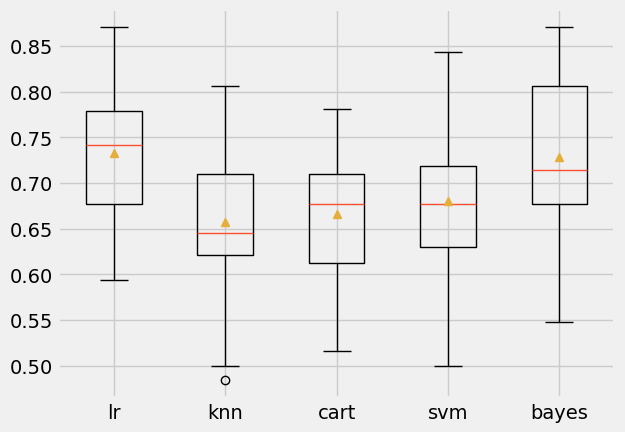

In [52]:

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_np, y_np)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()